# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Arkan Abdila Barts
- **Email:** arkanbarts@gmail.com
- **ID Dicoding:** Arkan Abdila Barts

## Menentukan Pertanyaan Bisnis

- Bagaimana grafik garis tren konsentrasi PM2.5 dan PM10 dalam jangka waktu tertentu di daerah Guanyuan?
- Bagaimana grafik tren rata-rata suhu di dearah Guanyuan dalam kurun waktu tertentu?
- Dalam kurun waktu tertentu, berapa curah hujan tertinggi dan terendah

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
guanyuan_df = pd.read_csv("file_data/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [3]:
guanyuan_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,34983,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,NaN,1.204071,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [4]:
guanyuan_df['date'] = pd.to_datetime(guanyuan_df[['year', 'month', 'day', 'hour']])

Di sini kita mendapat data air quality di daerah Guanyuan dan mendapat kolom datetime

### Assessing Data

In [5]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   year     35064 non-null  int64         
 2   month    35064 non-null  int64         
 3   day      35064 non-null  int64         
 4   hour     35064 non-null  int64         
 5   PM2.5    34448 non-null  float64       
 6   PM10     34635 non-null  float64       
 7   SO2      34590 non-null  float64       
 8   NO2      34405 non-null  float64       
 9   CO       33311 non-null  float64       
 10  O3       33891 non-null  float64       
 11  TEMP     35044 non-null  float64       
 12  PRES     35044 non-null  float64       
 13  DEWP     35044 non-null  float64       
 14  RAIN     35044 non-null  float64       
 15  wd       34983 non-null  object        
 16  WSPM     35050 non-null  float64       
 17  station  35064 non-null  object

In [6]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
date          0
dtype: int64

In [7]:
guanyuan_df.duplicated().sum()

np.int64(0)

Di sini kita tidak menemukan duplicated data dan menemukan banyak missing value, yaitu:<br>
| Column | Value  |
|--------|--------|
| PM2.5  | 616    |
| PM10   | 429    |
| SO2    | 474    |
| NO2    | 659    |
| CO     | 1753   |
| O3     | 1173   |
| TEMP   | 20     |
| PRES   | 20     |
| DEWP   | 20     |
| RAIN   | 20     |
| wd     | 81     |
| WSPM   | 14     |

### Cleaning Data

In [8]:
guanyuan_df.ffill(inplace=True)

In [9]:
guanyuan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [10]:
guanyuan_df.rename(columns={
        "PM2.5": "PM2_5"
    }, inplace=True)

<br>Kita asumsikan data-data yang ada di sini tidak mungkin berubah secara drastis dalam jangka waktu yang pendek, maka kita menggunakan ffill method untuk mengatasinya, dengan ffill kita sudah mengisi missing value dengan data sebelumnya

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
guanyuan_df["PM2_5_quality"] = guanyuan_df.PM2_5.apply(
    lambda x: "Good" if x <= 15 else (
        "Moderate" if 15 < x <= 35 else (
            "Unhealthy" if 35 < x <= 55 else (
                "Very Unhealthy" if 55 < x <= 150 else "Hazardous"
            )
        )
    )
)
guanyuan_df.tail()

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,PM2_5_quality
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan,2017-02-28 19:00:00,Good
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan,2017-02-28 20:00:00,Moderate
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan,2017-02-28 21:00:00,Moderate
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan,2017-02-28 22:00:00,Good
35063,35064,2017,2,28,23,15.0,27.0,5.0,53.0,600.0,33.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Guanyuan,2017-02-28 23:00:00,Good


In [12]:
guanyuan_df["PM10_quality"] = guanyuan_df.PM10.apply(
    lambda x: "Good" if x <= 50 else (
        "Moderate" if 50 < x <= 150 else (
            "Unhealthy" if 150 < x <= 250 else (
                "Very Unhealthy" if 250 < x <= 350 else "Hazardous"
            )
        )
    )
)
guanyuan_df.tail()

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,...,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,PM2_5_quality,PM10_quality
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,...,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan,2017-02-28 19:00:00,Good,Good
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,...,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan,2017-02-28 20:00:00,Moderate,Good
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,...,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan,2017-02-28 21:00:00,Moderate,Good
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,...,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan,2017-02-28 22:00:00,Good,Good
35063,35064,2017,2,28,23,15.0,27.0,5.0,53.0,600.0,...,8.6,1014.1,-15.9,0.0,NNE,1.3,Guanyuan,2017-02-28 23:00:00,Good,Good


In [13]:
guanyuan_df.groupby(by='PM10_quality').agg({'PM10': 'count'})

,PM10
PM10_quality,
Good,10895
Hazardous,803
Moderate,15519
Unhealthy,6076
Very Unhealthy,1771


In [14]:
guanyuan_df.groupby(by='PM2_5_quality').agg({'PM2_5': 'count'})

,PM2_5
PM2_5_quality,
Good,5879
Hazardous,5515
Moderate,6248
Unhealthy,4688
Very Unhealthy,12734


Di sini kita sudah mendapatkan kualitas udara berdasarkan PM2.5 dan PM10, selanjutnya kita akan mencari nilai temperatur tertinggi dan terendah

In [15]:
guanyuan_df['TEMP'].min()

np.float64(-16.8)

In [16]:
guanyuan_df['TEMP'].max()

np.float64(40.5)

Di sini kita sudah mendapatkan semua data yang dibutuhkan, kita akan membuat visualisasinya

## Visualization & Explanatory Analysis

- Bagaimana grafik garis tren konsentrasi PM2.5 dan PM10 dalam jangka waktu tertentu di daerah Guanyuan?

(array([15887., 16071., 16252., 16436., 16617., 16801., 16983., 17167.]),
 [Text(15887.0, 0, '2013-07'),
  Text(16071.0, 0, '2014-01'),
  Text(16252.0, 0, '2014-07'),
  Text(16436.0, 0, '2015-01'),
  Text(16617.0, 0, '2015-07'),
  Text(16801.0, 0, '2016-01'),
  Text(16983.0, 0, '2016-07'),
  Text(17167.0, 0, '2017-01')])

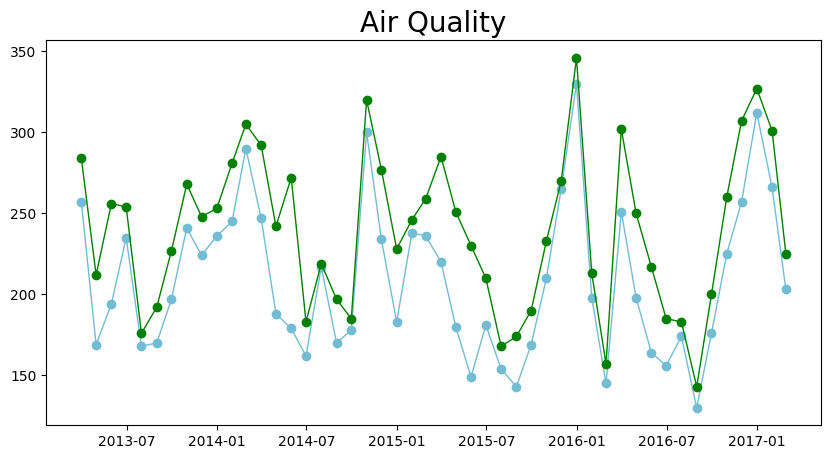

In [17]:
daily_air_df = guanyuan_df.resample(rule='ME', on='date').agg({
    "PM2_5": lambda x: x.unique().tolist(),
    "PM10": lambda x: x.unique().tolist()
})

daily_air_df = daily_air_df.reset_index()

plt.figure(figsize=(10, 5))
plt.plot(daily_air_df["date"], [len(x) for x in daily_air_df["PM2_5"]], marker='o', linewidth=1, color="#72BCD4") 
plt.plot(daily_air_df["date"], [len(x) for x in daily_air_df["PM10"]], marker='o', linewidth=1, color="green") 
plt.title("Air Quality", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 

In [18]:
PM2_5_data = guanyuan_df.groupby(by='date').agg({
    "PM2_5": lambda x: x.unique().tolist(),
    "PM2_5_quality": lambda x: x.unique().tolist()
}).reset_index()

PM2_5_data.max()

date             2017-02-28 23:00:00
PM2_5                        [680.0]
PM2_5_quality       [Very Unhealthy]
dtype: object

- Bagaimana grafik tren rata-rata suhu di dearah Guanyuan dalam kurun waktu tertentu?

(array([15887., 16071., 16252., 16436., 16617., 16801., 16983., 17167.]),
 [Text(15887.0, 0, '2013-07'),
  Text(16071.0, 0, '2014-01'),
  Text(16252.0, 0, '2014-07'),
  Text(16436.0, 0, '2015-01'),
  Text(16617.0, 0, '2015-07'),
  Text(16801.0, 0, '2016-01'),
  Text(16983.0, 0, '2016-07'),
  Text(17167.0, 0, '2017-01')])

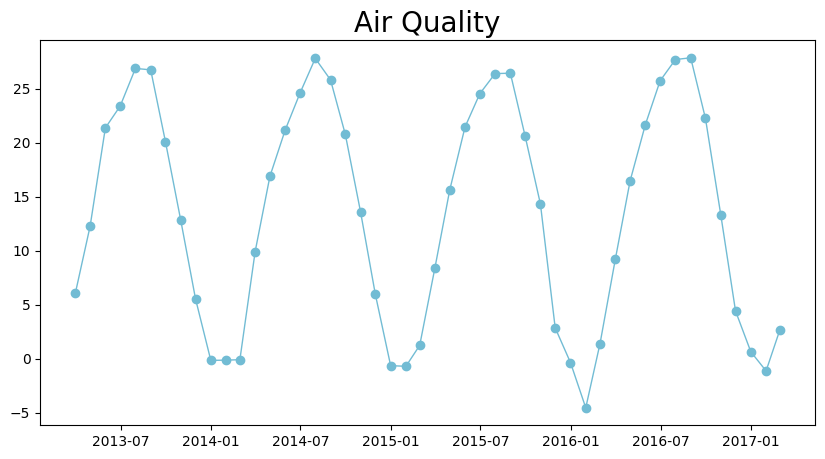

In [22]:
daily_tmp_df = guanyuan_df.resample(rule='ME', on='date').agg({
    "TEMP": "mean"
})

daily_tmp_df = daily_tmp_df.reset_index()

plt.figure(figsize=(10, 5))
plt.plot(daily_air_df["date"], daily_tmp_df["TEMP"], marker='o', linewidth=1, color="#72BCD4")
plt.title("Temperature", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 

- Dalam kurun waktu tertentu, berapa curah hujan tertinggi dan terendah

In [20]:
rain_data = guanyuan_df.groupby(by='date').agg({
    "RAIN": lambda x: x.unique().tolist()
}).reset_index()

rain_data.max()

date    2017-02-28 23:00:00
RAIN                 [72.5]
dtype: object

In [21]:
rain_data = guanyuan_df.groupby(by='date').agg({
    "RAIN": lambda x: x.unique().tolist()
}).reset_index()

rain_data.min()

date    2013-03-01 00:00:00
RAIN                  [0.0]
dtype: object

Dari sini kita mendapat visualisasi yang cukup baik untuk menjawab semua pertanyaan analisis data

## Conclusion

- Bagaimana grafik garis tren konsentrasi PM2.5 dan PM10 dalam jangka waktu tertentu di daerah Guanyuan?
**Tren naik-turun grafik berubah cukup drastis di setiap bulannya**
- Bagaimana grafik tren rata-rata suhu di dearah Guanyuan dalam kurun waktu tertentu?
**Perubahan suhu yang terjadi naik-turun secara drastis disetiap kuartal**
- Dalam kurun waktu tertentu, berapa curah hujan tertinggi dan terendah
**Curah hujan yang terjadi tidak terlalu tinggi bahkan pada tingkat tertingginya**